# Évolution des émissions de gaz à effet de serre par activité 

Lien vers le dataset : https://www.insee.fr/fr/statistiques/2015759

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
URL = "https://www.insee.fr/fr/statistiques/fichier/2015759/deve-envir-emissions-co2.xlsx"
df = pd.read_excel(URL)

In [50]:
def transform(dataset):
    colonnes = ['Émissions de gaz à effet de serre par activité'] + [ f'{i}' for i in range(1990,2023)]
    dataset.set_axis(colonnes, axis=1, inplace=True)
    dataset = dataset[3:11].reset_index()
    dataset.drop('index', axis=1, inplace = True)
    return dataset
df = transform(df)

In [51]:
df

,Émissions de gaz à effet de serre par activité,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Industrie de l’énergie,78.851202,80.089495,81.357832,69.065977,65.973570,68.502396,72.081708,67.707550,80.069139,...,60.838441,47.198489,49.956407,53.546045,57.306330,47.982937,46.237280,41.266444,42.490917,44.575656
1,Industrie manufacturière et construction,139.412357,151.891836,139.881424,134.659609,135.640506,136.156076,138.341342,137.138262,131.172430,...,88.703973,86.003308,83.687003,83.202542,82.886590,82.798769,79.778832,72.046643,77.952643,72.973903
2,Traitement centralisé des déchets,15.770500,16.468496,17.264753,18.042975,18.419108,18.651170,18.695998,18.681612,19.112439,...,16.672992,16.007408,14.990339,15.011350,15.092677,14.821750,16.019293,15.927553,15.208793,15.177475
3,Usage des bâtiments et activités résidentiels/...,93.260689,102.932198,99.120231,95.513850,89.059078,88.948882,98.907077,94.048578,98.784997,...,98.034366,81.848655,84.846037,84.777680,84.062820,79.047162,76.038243,71.317465,75.090141,64.024935
4,Agriculture/sylviculture,88.297176,87.390855,87.067203,85.916454,85.034512,85.708999,86.605312,86.666545,86.890664,...,81.963010,83.494725,83.110580,81.690808,81.314373,80.438064,78.615927,78.244410,76.506548,76.524915
5,Transport routier,115.915813,118.392893,122.991066,123.108949,123.974319,125.388553,126.592090,129.156688,131.361690,...,128.930046,128.849144,130.256828,130.477445,130.315312,127.190236,126.175020,107.323086,120.460013,122.396855
6,Autres transports,7.780647,8.035951,7.790501,7.889825,7.928300,8.495231,9.001003,9.182790,9.429353,...,7.865051,7.630638,7.640084,7.657140,7.971813,8.087180,8.195000,6.203055,7.091376,8.097555
7,Ensemble,539.288385,565.201724,555.473011,534.197638,526.029392,531.851307,550.224531,542.582026,556.820713,...,483.007880,451.032367,454.487278,456.363011,458.949913,440.366098,431.059595,392.328656,414.800430,403.771294


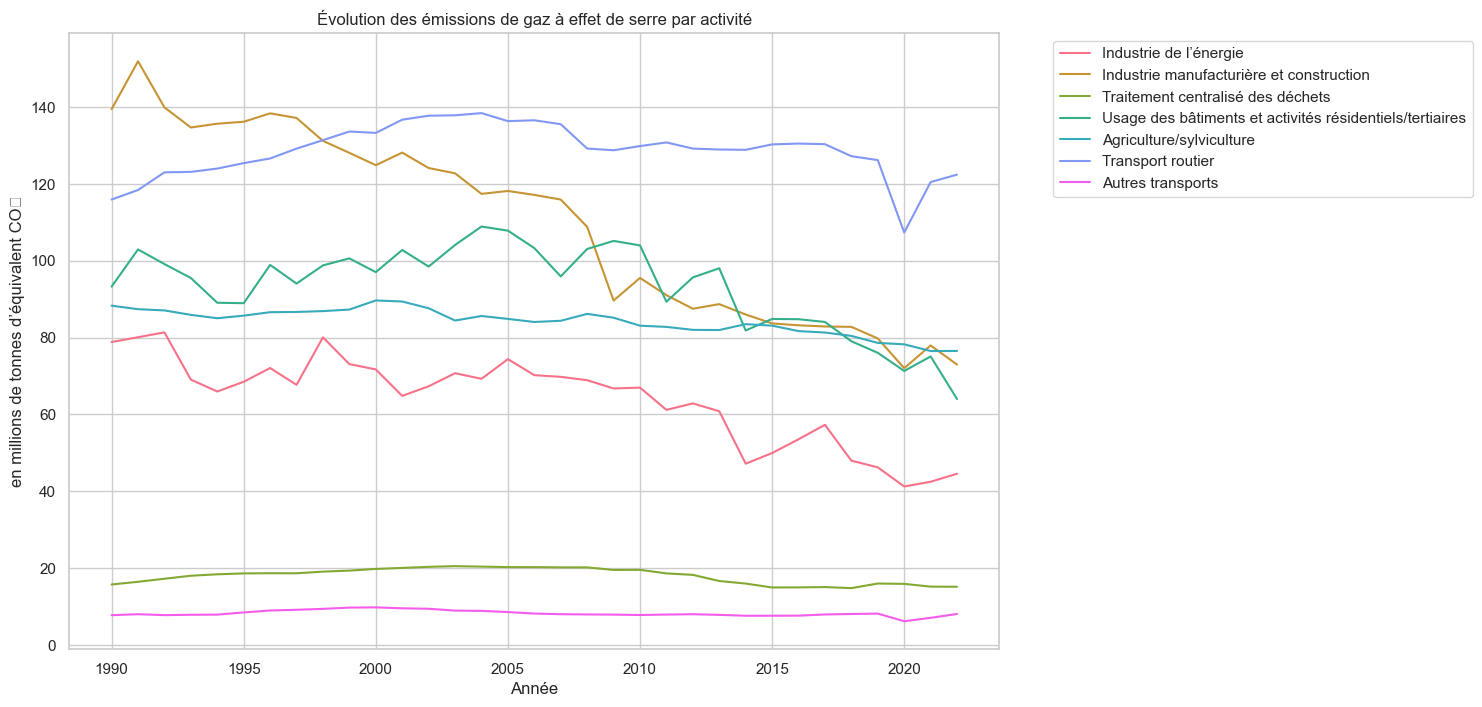

In [75]:
# Tracer l'évolution 
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", n_colors=7)
colonnes = df.columns.to_list()[1:]
colonnes_int = [int(x) for x in colonnes]

for i in df.index.to_list():
    if i<7:
        nom = df['Émissions de gaz à effet de serre par activité'][i]
        evol = [df[col][i] for col in colonnes]
        #evol = df[colonnes][i:i+1].values
        plt.plot(colonnes_int, evol, label = f'{nom}', color = palette[i])
    else:
        pass
plt.xlabel('Année')
plt.ylabel('en millions de tonnes d’équivalent CO₂')
plt.title('Évolution des émissions de gaz à effet de serre par activité')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()